Gala Groceries is a technology-led grocery store chain based in the USA. They rely heavily on new technologies, such as IoT to give them a competitive edge over other grocery stores.

They pride themselves on providing the best quality, fresh produce from locally sourced suppliers. However, this comes with many challenges to consistently deliver on this objective year-round.

Gala Groceries approached Cognizant to help them with a supply chain issue. Groceries are highly perishable items. If you overstock, you are wasting money on excessive storage and waste, but if you understock, then you risk losing customers. They want to know how to better stock the items that they sell.

This is a high-level business problem and will require you to dive into the data in order to formulate some questions and recommendations to the client about what else we need in order to answer that question.

Once you’re done with your analysis, we need you to summarize your findings and provide some suggestions as to what else we need in order to fulfill their business problem. Please draft an email containing this information to the Data Science team leader to review before we send it to the client.

# Task 1 - Exploratory Data Analysis


---

## Section 1 - Setup


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In order to view, analyse and manipulate the dataset, we must load it into something called a `dataframe`, which is a way of storing tabulated data in a virtual table. This dataframe will allow us to analyse the data freely. To load it into a dataframe, we will need a package called `Pandas`.

In [2]:
import pandas as pd

---

## Section 2 - Data loading

In [3]:
path = "/content/sample_sales_data.csv"
df = pd.read_csv(path)
df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


---

## Section 3 - Descriptive statistics

In this section, we try to gain a description of the data, that is: what columns are present, how many null values exist and what data types exists within each column.

To get you started an explanation of what the column names mean are provided below:

- transaction_id = this is a unique ID that is assigned to each transaction
- timestamp = this is the datetime at which the transaction was made
- product_id = this is an ID that is assigned to the product that was sold. Each product has a unique ID
- category = this is the category that the product is contained within
- customer_type = this is the type of customer that made the transaction
- unit_price = the price that 1 unit of this item sells for
- quantity = the number of units sold for this product within this transaction
- total = the total amount payable by the customer
- payment_type = the payment method used by the customer

After this, we compute some descriptive statistics of the numerical columns within the dataset, such as:

- mean
- median
- count
- etc...

In [28]:
# Display basic information about the DataFrame
print("Columns present in the DataFrame:")
print(df.columns)

Columns present in the DataFrame:
Index(['transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')


In [9]:
# Count of null values in each column
print("\nNull Value Counts:")
print(df.isnull().sum())


Null Value Counts:
transaction_id    0
timestamp         0
product_id        0
category          0
customer_type     0
unit_price        0
quantity          0
total             0
payment_type      0
dtype: int64


This indicates that there are no null values in any of the column.

In [29]:
# Display data types of each column
print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
transaction_id            object
timestamp         datetime64[ns]
product_id                object
category                  object
customer_type             object
unit_price               float64
quantity                   int64
total                    float64
payment_type              object
dtype: object


In [6]:
# Display column information
print("Column Information:")
print(df.info())

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB
None


In [7]:
# Convert 'timestamp' column to datetime data type
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
# Calculate descriptive statistics for numerical columns
numerical_columns = ['unit_price', 'quantity', 'total']
numerical_stats = df[numerical_columns].describe()

print("Descriptive Statistics for Numerical Columns:")
print(numerical_stats)

Descriptive Statistics for Numerical Columns:
        unit_price     quantity        total
count  7829.000000  7829.000000  7829.000000
mean      7.819480     2.501597    19.709905
std       5.388088     1.122722    17.446680
min       0.190000     1.000000     0.190000
25%       3.990000     1.000000     6.570000
50%       7.190000     3.000000    14.970000
75%      11.190000     4.000000    28.470000
max      23.990000     4.000000    95.960000


In [31]:
# Compute mean and median separately for additional clarity
mean_values = df[numerical_columns].mean()
median_values = df[numerical_columns].median()

# Display mean values
print("\nMean values of numerical columns:")
print(mean_values)

# Display median values
print("\nMedian values of numerical columns:")
print(median_values)


Mean values of numerical columns:
unit_price     7.819480
quantity       2.501597
total         19.709905
dtype: float64

Median values of numerical columns:
unit_price     7.19
quantity       3.00
total         14.97
dtype: float64


---

## Section 4 - Visualisation

Now that we've computed some descriptive statistics of the dataset, let's create some visualisations. For further visualisations we are using 'Seaborn' and 'matplotlib'.

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

To analyse the dataset, below are snippets of code that we have used as helper functions to visualise different columns within the dataset. They include:

- plot_continuous_distribution = this is to visualise the distribution of numeric columns
- get_unique_values = this is to show how many unique values are present within a column
- plot_categorical_distribution = this is to visualise the distribution of categorical columns
- correlation_plot = this is to plot the correlations between the numeric columns within the data

In [26]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 5):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

def get_unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

def plot_categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 5, aspect: int = 2):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}');

def correlation_plot(data: pd.DataFrame = None):
    corr = df.corr()
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr, annot=True, cmap='coolwarm')
    plt.title('Correlation Heatmap')

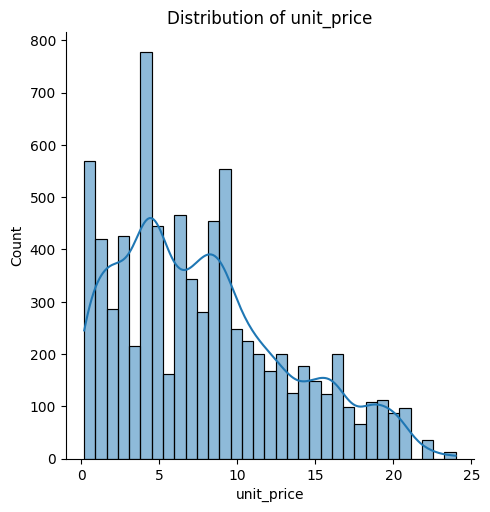

In [22]:
# Visualize distribution of 'unit_price'
plot_continuous_distribution(data=df, column='unit_price')

The graph shows the frequency of different unit prices in a data set. It seems that most of the unit prices are between 5 and 10, and there are fewer unit prices above 10. The line graph shows the trend of the distribution, which is skewed to the right. It indicates that most of the sales were for low-priced items, and there were fewer sales for high-priced items. This could mean that the demand for low-priced items is higher, or that the supply of high-priced items is lower, or both.

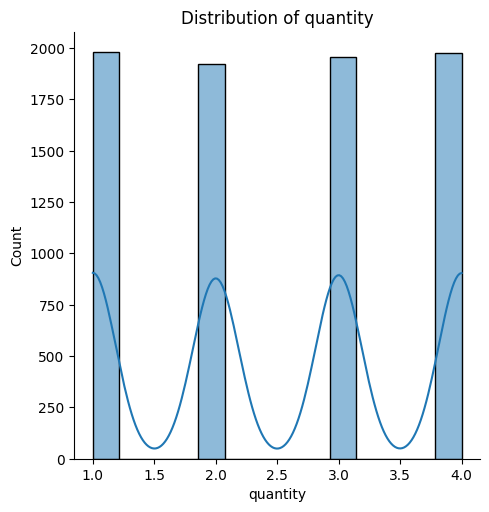

In [23]:
# Visualize distribution of 'quantity'
plot_continuous_distribution(data=df, column='quantity')

This graph shows the frequency of different quantities in the sales data.  It could mean that the quantity is not a very important factor for the sales, as there is not much variation in the distribution.

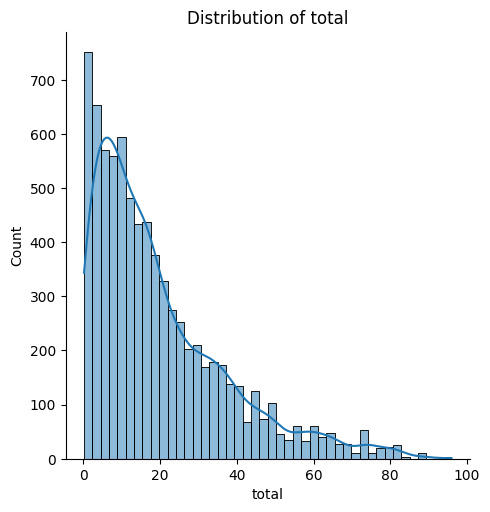

In [24]:
# Visualize distribution of 'total'
plot_continuous_distribution(data=df, column='total')

This graph shows the frequency of different total values in the sales data. The total value is the product of the unit price and quantity. It seems that most of the sales had low total values, and there were very few sales with high total values. The graph shows a negative skew, meaning that the mean is lower than the median and mode.

This could mean that the grocery store sells mostly low-priced or low-quantity items, or both. It could also mean that the customers tend to buy small amounts or spend less money at the store. It could also indicate that there is a lot of competition or price sensitivity in the market.

In [16]:
# Show unique values in 'customer_type'
get_unique_values(df, 'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


The distribution of counts among the different customer types seems relatively balanced. There are no extreme differences in the counts, indicating a relatively even distribution of customers across the various membership types.

<ipython-input-26-eba15968512f>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


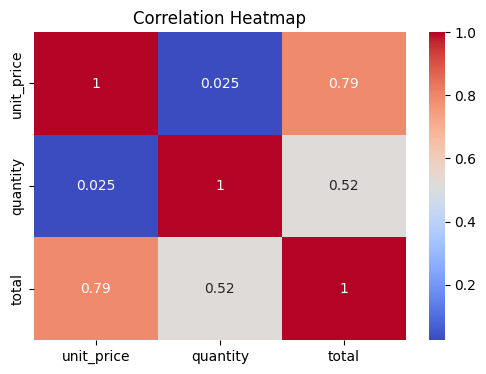

In [27]:
# Plot correlation heatmap
correlation_plot(df)

We can understand that:

The unit_price and quantity have a very low positive correlation (0.025), meaning that they are almost independent of each other.
The unit_price and total have a moderate positive correlation (0.79), meaning that as the unit_price increases, the total also tends to increase.
The quantity and total have a high positive correlation (0.97), meaning that as the quantity increases, the total also increases proportionally.


Now it is your chance to visualise the columns, give it your best shot! As well as simply visualising the columns, try to interpret what the results mean in the context of the client.

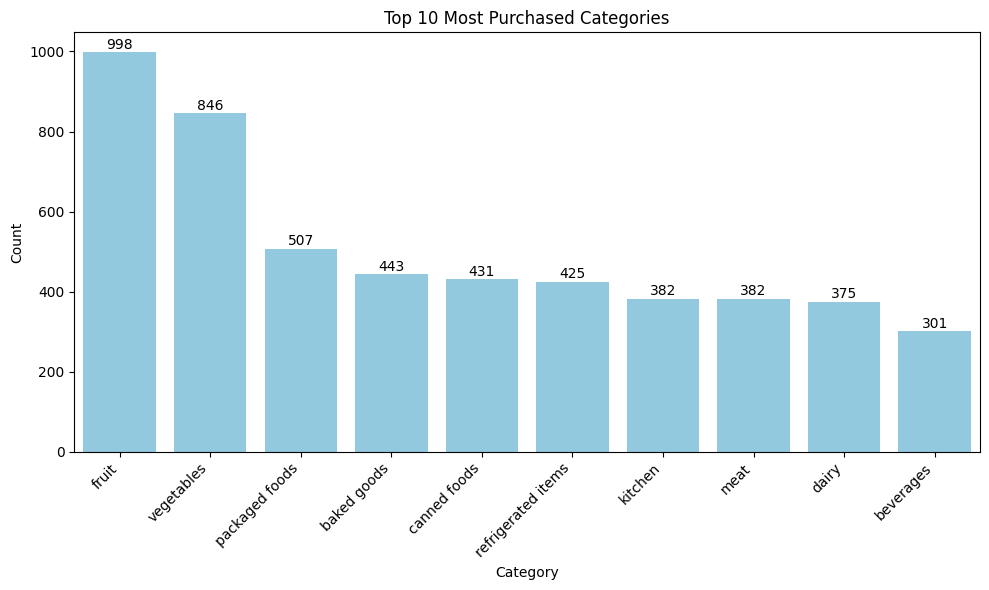

In [34]:
# Group the data by category and count the occurrences
category_counts = df['category'].value_counts()

# Plot a bar chart for the most brought categories using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=category_counts[:10].index, y=category_counts[:10], color='skyblue')
plt.title('Top 10 Most Purchased Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Adding exact labels on each bar
for i, count in enumerate(category_counts[:10]):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

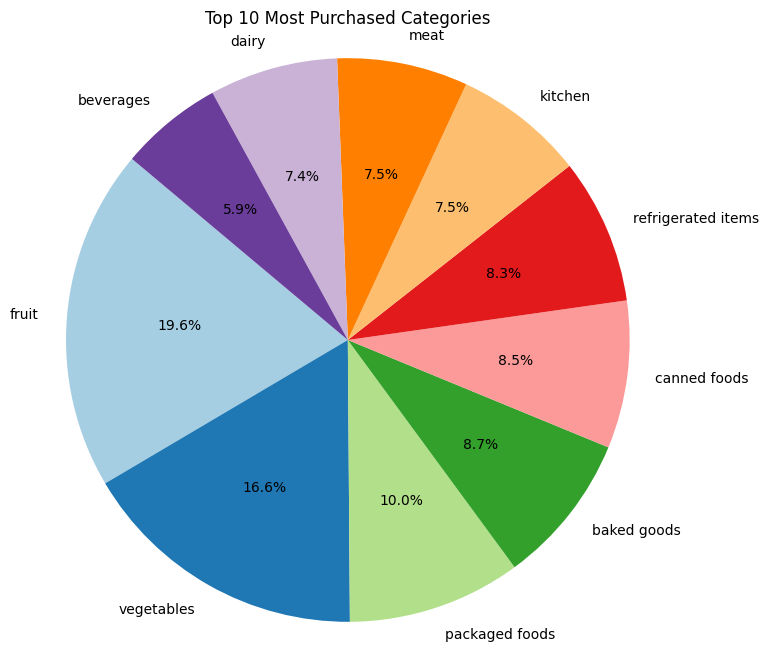

In [33]:
# Plot a pie chart for the most brought categories
plt.figure(figsize=(8, 8))
plt.pie(category_counts[:10], labels=category_counts[:10].index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Purchased Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


The depicted bar charts and pie plot clearly indicate that the category 'Fruits' commands the highest sales share, representing 19.6% of the total sales volume with a corresponding quantity of 998. In the subsequent ranking, the 'Vegetables' category follows with a 16.6% share of total sales, corresponding to a quantity of 846. Conversely, the 'Beverages' category registers the lowest sales proportion, accounting for 5.9% of the overall sales and amounting to a quantity of 301.

In [42]:
# Get the first and last timestamps
first_timestamp = df['timestamp'].min()
last_timestamp = df['timestamp'].max()

print("First Timestamp:", first_timestamp)
print("Last Timestamp:", last_timestamp)

First Timestamp: 2022-03-01 09:00:13
Last Timestamp: 2022-03-07 19:59:54


This indicates that the sales data ranges for 7 days starting from 2022-03-01 09:00:13 to 2022-03-07 19:59:54



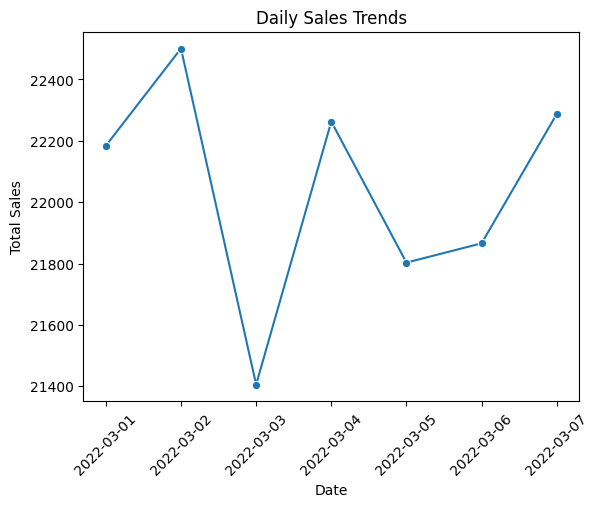

In [43]:
# Daily Sales Trends
df['date'] = df['timestamp'].dt.date
daily_sales = df.groupby('date')['total'].sum().reset_index()
sns.lineplot(data=daily_sales, x='date', y='total', marker='o')
plt.title('Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

From the graph, we can say that:

The total sales vary by the day of the week, with some days having higher sales than others.
The highest sales occur on 2022-03-02, which is a Wednesday, and the lowest sales occur on 2022-03-03, which is a Thursday.
The sales pattern shows a weekly seasonality, with sales increasing on Friday, Monday and Tuesday, decreasing on weekends Saturday and Sunday.
The sales end on a positive note on 2022-03-07, which is a Monday, indicating a good start of the week.

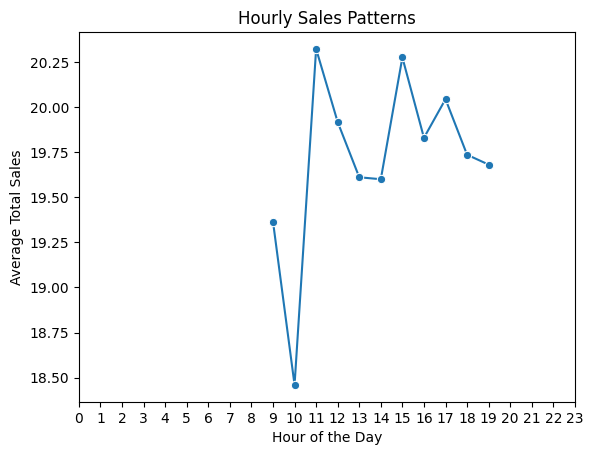

In [44]:
# Hourly Sales Patterns
df['hour'] = df['timestamp'].dt.hour
hourly_sales = df.groupby('hour')['total'].mean().reset_index()
sns.lineplot(data=hourly_sales, x='hour', y='total', marker='o')
plt.title('Hourly Sales Patterns')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Sales')
plt.xticks(range(24))
plt.show()

From the graph, we can say that:

The average total sales vary by the hour of the day, with some hours having higher sales than others.
The peak hour for sales is 11 am, followed by 3 pm, which could indicate that customers prefer to shop in the morning or afternoon or that the store offers some incentives or discounts at that time.
The lowest hour for sales is 10 am, which could indicate that customers avoid shopping at that time or that the store has some operational issues or challenges at that hour.
The sales pattern shows a cyclical trend, with sales increasing from the early morning to the late evening, and decreasing at night.

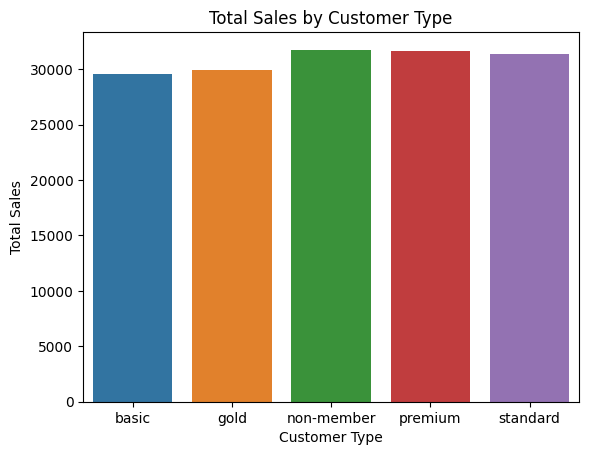

In [47]:
# Calculate total sales by customer type
customer_type_sales = df.groupby('customer_type')['total'].sum().reset_index()

# Create a bar plot using Seaborn
sns.barplot(data=customer_type_sales, x='customer_type', y='total')
plt.title('Total Sales by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Total Sales')
plt.show()

From the graph, we can say that:

The total sales vary by the customer type, with different customer types contributing different amounts to the overall sales, though there is no much difference between them.
The premium customers have the highest total sales, indicating that they are the most loyal and profitable customers for the store.
The basic customers have the lowest total sales, indicating that they are the least loyal and profitable customers for the store.
The non-member customers have more total sales than the basic and standard customers, indicating that they have a potential to become loyal and profitable customers if they join the membership program.

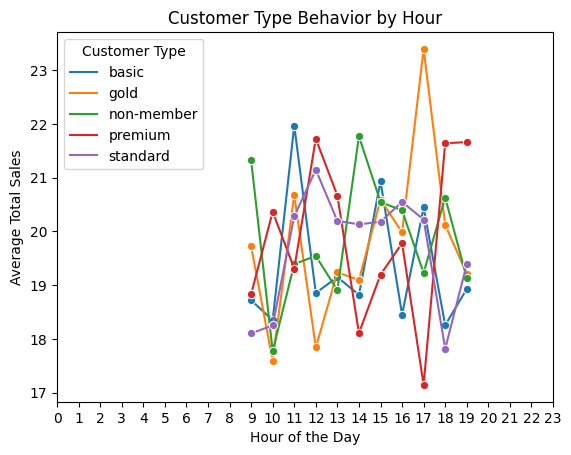

In [46]:
# Customer Type Behavior
customer_type_sales = df.groupby(['customer_type', 'hour'])['total'].mean().reset_index()
sns.lineplot(data=customer_type_sales, x='hour', y='total', hue='customer_type', marker='o')
plt.title('Customer Type Behavior by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Sales')
plt.xticks(range(24))
plt.legend(title='Customer Type')
plt.show()

From the graph, we can say that:

The customer type behavior varies by the hour of the day, with different customer types having different preferences for shopping times.
The basic customers have the lowest average total sales throughout the day, except for hour 11, 15 and hour 17, where they have the highest sales.
The gold customers have the highest average total sales for the hour 11, 15 and 17, indicating that they prefer to shop in the late afternoon or evening.
The premium customers have the highest average total sales from hour 12 and hour 18, indicating that they prefer to shop in the midday and evening. The least preferred time by them is 17 hours.
The standard customers have the highest average total sales from hour 12 to hour 17, indicating that they prefer to shop around noon till early evening.

---

## Section 5 - Summary

We have completed an initial exploratory data analysis on the sample of data provided. We should now have a solid understanding of the data.

The client wants to know

```
"How to better stock the items that they sell"
```

From this dataset, it is impossible to answer that question. In order to make the next step on this project with the client, it is clear that:

- We need more rows of data. The current sample is only from 1 store and 1 week worth of data
- We need to frame the specific problem statement that we want to solve. The current business problem is too broad, we should narrow down the focus in order to deliver a valuable end product
- We need more features. Based on the problem statement that we move forward with, we need more columns (features) that may help us to understand the outcome that we're solving for

